In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
df['Avg. Area Number of Bedrooms'].value_counts()

4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02     6
5.42     6
6.42     5
Name: Avg. Area Number of Bedrooms, Length: 255, dtype: int64

# EDA

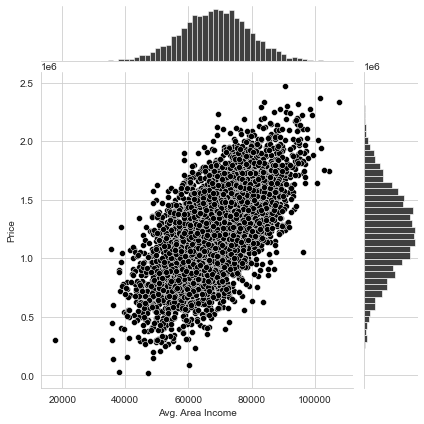

In [10]:
sns.set_style('whitegrid')
sns.jointplot(data=df, x='Avg. Area Income', y='Price', color='black')

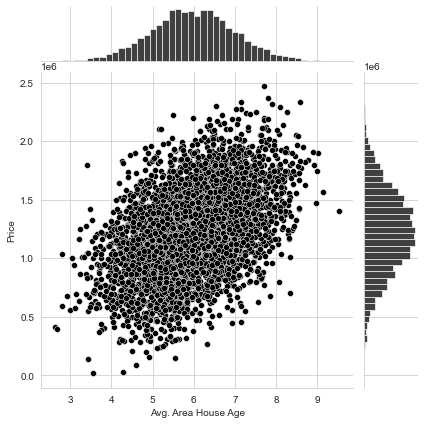

In [11]:
sns.set_style('whitegrid')
sns.jointplot(data=df, x='Avg. Area House Age', y='Price', color='black')

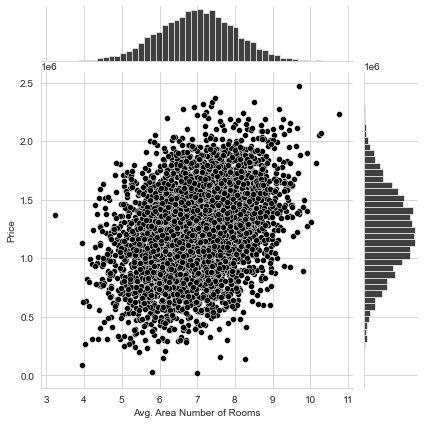

In [13]:
sns.set_style('whitegrid')
sns.jointplot(data=df, x='Avg. Area Number of Rooms', y='Price', color='black')

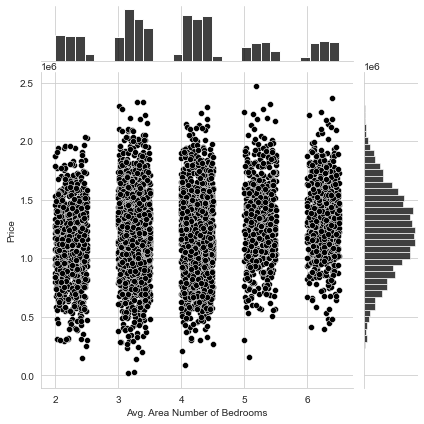

In [24]:
sns.set_style('whitegrid')
sns.jointplot(data=df, x='Avg. Area Number of Bedrooms', y='Price', color='black')

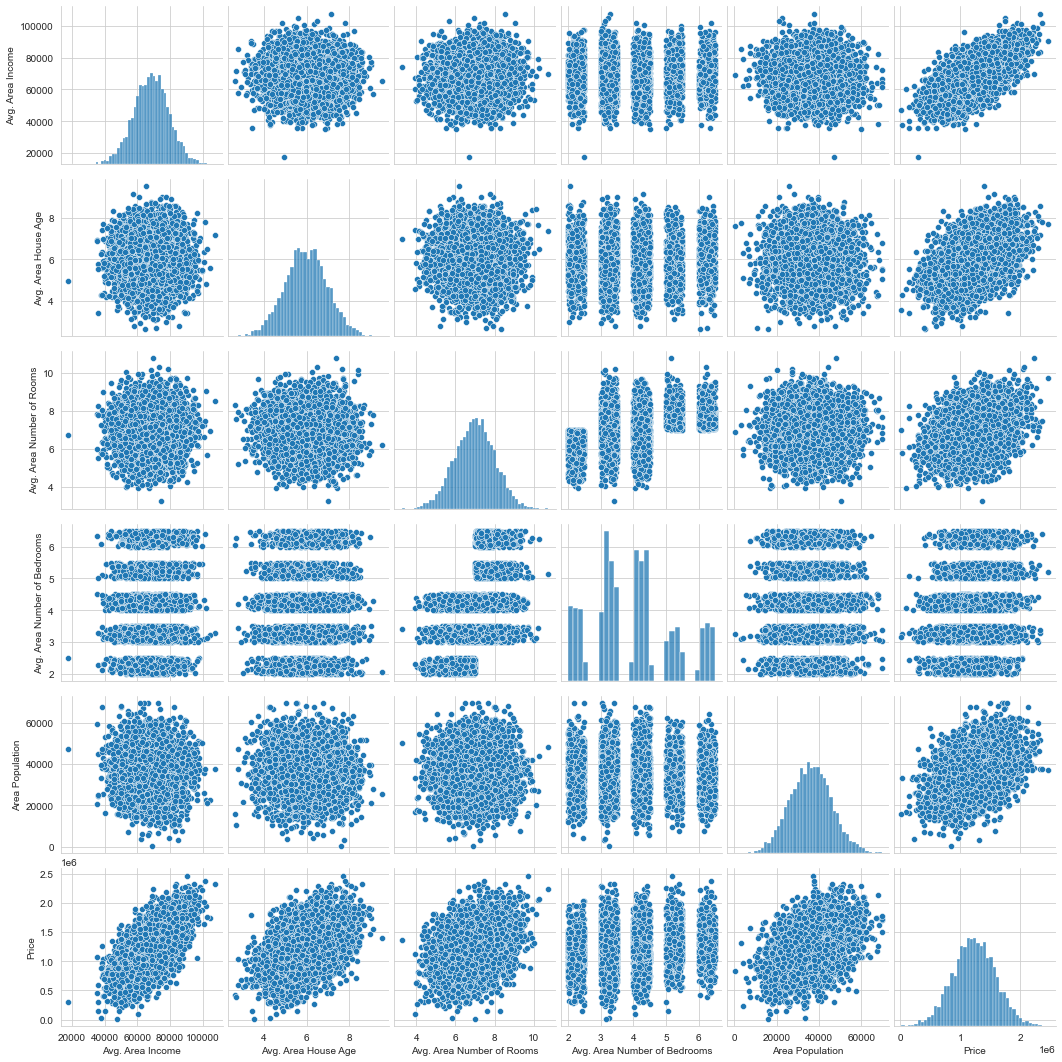

In [25]:
sns.pairplot(df)

<AxesSubplot:>

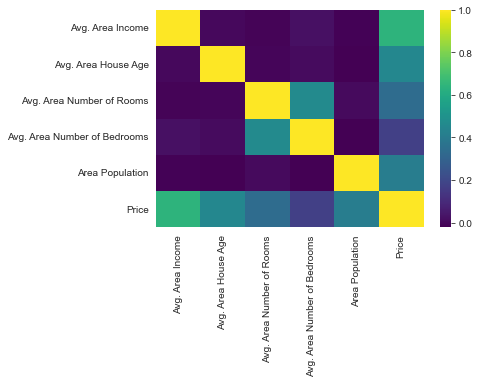

In [27]:
sns.heatmap(df.corr(), cmap='viridis')

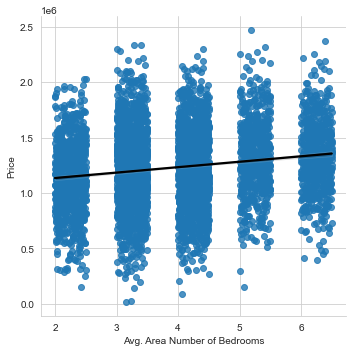

In [30]:
sns.lmplot(x='Avg. Area Number of Bedrooms', y='Price', data=df, line_kws={'color': 'black'})

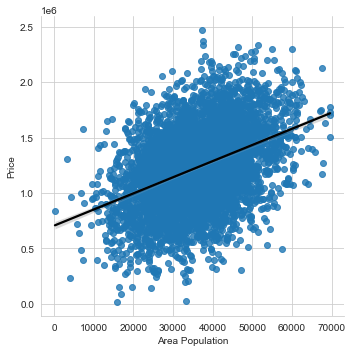

In [31]:
sns.lmplot(x='Area Population', y='Price', data=df, line_kws={'color': 'black'})

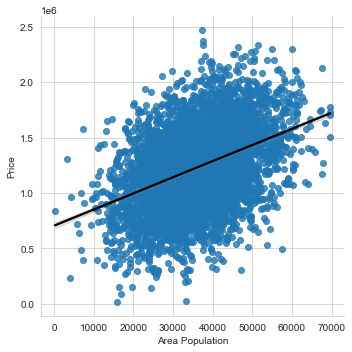

In [34]:
sns.lmplot(x='Area Population', y='Price', data=df, line_kws={'color': 'black'}, palette='black')

# Feature Engineering

### Bedrooms 

In [36]:
df['rounded_bedrooms'] = df['Avg. Area Number of Bedrooms'].round().astype(int)

In [37]:
df['rounded_down_bedrooms'] = np.floor(df['Avg. Area Number of Bedrooms']).astype(int)

In [46]:
sum(df['rounded_bedrooms']==df['rounded_down_bedrooms'])

4956

In [47]:
len(df)

5000

<AxesSubplot:xlabel='rounded_bedrooms', ylabel='Price'>

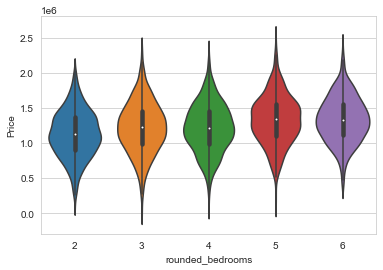

In [63]:
sns.violinplot(x='rounded_bedrooms', y='Price', data=df, line_kws={'color': 'black'})

### Address

In [48]:
import re

In [49]:
def extract_state(address):
    match = re.search(r', ([A-Z]{2}) \d', address)
    return match.group(1) if match else None

df['State'] = df['Address'].apply(extract_state)

In [50]:
df['State'].isnull().sum()

514

In [51]:
def extract_state(address):
    match = re.search(r', ([A-Z]{2}) \d', address)
    if match:
        return match.group(1)
    else:
        match = re.search(r'(APO|FPO|DPO) ([A-Z]{2}) \d', address)
        return match.group(2) if match else None

In [53]:
df['State'] = df['Address'].apply(extract_state)

In [54]:
df['State'].isnull().sum()

0

<AxesSubplot:xlabel='State', ylabel='Price'>

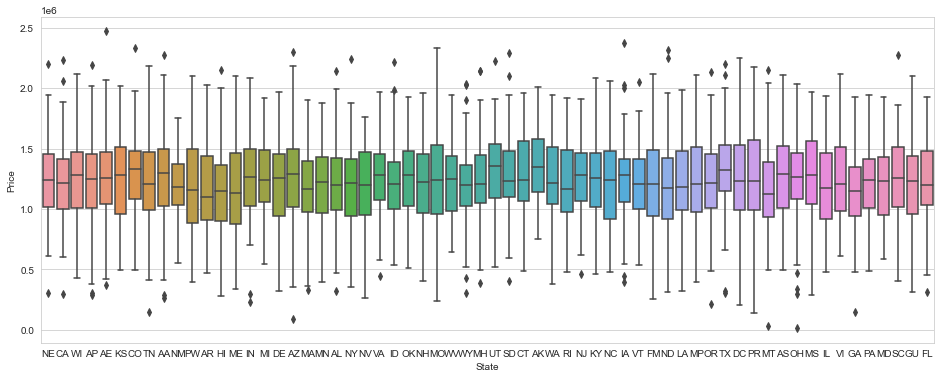

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='State', y='Price')

# One Hot Encoding 

In [56]:
one_hot = pd.get_dummies(df['State'], drop_first=True)
df = df.join(one_hot)

In [57]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'rounded_bedrooms', 'rounded_down_bedrooms', 'State', 'AE', 'AK', 'AL',
       'AP', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

# Training and Testing Data

In [66]:
y = df['Price']
X1 = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X2 = df[['Avg. Area Income', 'Avg. Area House Age', 'rounded_bedrooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X3 = df.drop(['Price','Address','rounded_bedrooms','rounded_down_bedrooms','State'],axis=1)

In [67]:
X1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [68]:
X2

,Avg. Area Income,Avg. Area House Age,rounded_bedrooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,4,4.09,23086.800503
1,79248.642455,6.002900,3,3.09,40173.072174
2,61287.067179,5.865890,5,5.13,36882.159400
3,63345.240046,7.188236,3,3.26,34310.242831
4,59982.197226,5.040555,4,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,3,3.46,22837.361035
4996,78491.275435,6.999135,4,4.02,25616.115489
4997,63390.686886,7.250591,2,2.13,33266.145490
4998,68001.331235,5.534388,5,5.44,42625.620156


In [69]:
X3

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,AE,AK,AL,AP,AR,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3)

# Model 

In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()

In [75]:
lm1.fit(X1_train,y1_train)
lm2.fit(X2_train,y2_train)
lm3.fit(X3_train,y3_train)

LinearRegression()

In [77]:
# The coefficients
print('Coefficients: \n', lm1.coef_)
print('Coefficients: \n', lm2.coef_)
print('Coefficients: \n', lm3.coef_)

Coefficients: 
 [2.14705028e+01 1.64855075e+05 1.19521788e+05 1.90628936e+03
 1.53534043e+01]
Coefficients: 
 [2.11443789e+01 1.63966570e+05 4.09347749e+04 7.76305823e+03
 1.51994698e+01]
Coefficients: 
 [ 2.14969703e+01  1.65944090e+05  1.20328265e+05  3.61459147e+03
  1.52254089e+01  7.56319497e+03  3.16394131e+04  2.46937144e+03
  7.79796550e+03  3.13714249e+03  3.10994418e+04  3.08501012e+03
  1.54841297e+04  1.19193853e+03  3.01281255e+04 -1.47446448e+04
 -8.89333018e+03 -1.01889361e+04  9.80495685e+03 -3.96587207e+03
  3.58976691e+04  2.13625430e+04  7.39976007e+03  6.13387002e+03
  1.93900835e+04  2.03312722e+03  1.12954588e+04  2.19808215e+04
  2.31068067e+04  2.72801613e+04  7.31527884e+02  1.45916448e+04
  4.20919646e+04  1.34192775e+04 -4.64179039e+03  2.56226560e+03
  1.98645624e+04 -9.95736764e+02 -1.14847946e+04  2.44858264e+04
  2.99744454e+04  1.16970177e+04  3.94662258e+03  3.58992302e+03
 -2.50746402e+03 -4.66882447e+03  7.68385448e+03  1.19299370e+04
 -1.15292270e+04

# Predictions

In [78]:
predictions1 = lm1.predict(X1_test)
predictions2 = lm2.predict(X2_test)
predictions3 = lm3.predict(X3_test)

Text(0, 0.5, 'Predicted Y1')

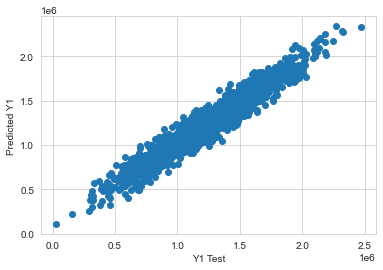

In [79]:
plt.scatter(y1_test,predictions1)
plt.xlabel('Y1 Test')
plt.ylabel('Predicted Y1')

Text(0, 0.5, 'Predicted Y2')

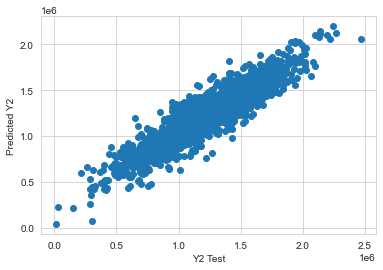

In [80]:
plt.scatter(y2_test,predictions2)
plt.xlabel('Y2 Test')
plt.ylabel('Predicted Y2')

Text(0, 0.5, 'Predicted Y3')

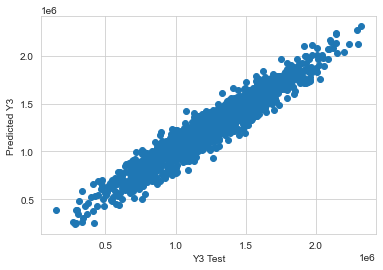

In [81]:
plt.scatter(y3_test,predictions3)
plt.xlabel('Y3 Test')
plt.ylabel('Predicted Y3')

## Evaluating the Model

In [82]:
from sklearn import metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y1_test, predictions1))
print('MSE:', metrics.mean_squared_error(y1_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions1)))

MAE: 82216.13752271622
MSE: 10347925275.3117
RMSE: 101724.75252027749


In [85]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 118136.58769753417
MSE: 21839623476.67662
RMSE: 147782.35170911517


In [84]:
print('MAE:', metrics.mean_absolute_error(y3_test, predictions3))
print('MSE:', metrics.mean_squared_error(y3_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, predictions3)))

MAE: 82921.77425002241
MSE: 10582137414.745808
RMSE: 102869.51645043252


# Residuals

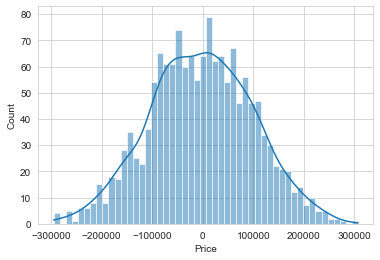

In [98]:
sns.histplot((y1_test-predictions1),bins=50,kde=True);

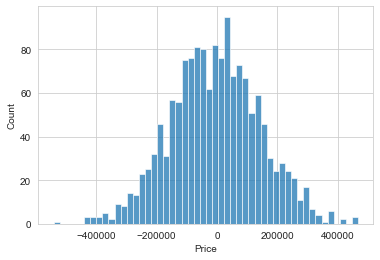

In [87]:
sns.histplot((y2_test-predictions2),bins=50);

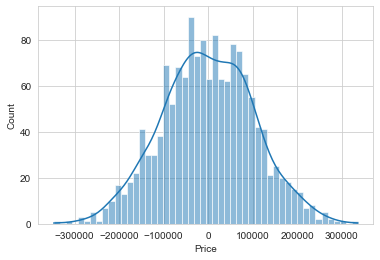

In [97]:
sns.histplot((y3_test-predictions3),bins=50,kde=True);

# Coefficients

In [89]:
coeffecients = pd.DataFrame(lm1.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Area Income,21.470503
Avg. Area House Age,164855.075003
Avg. Area Number of Rooms,119521.788184
Avg. Area Number of Bedrooms,1906.289363
Area Population,15.353404


In [90]:
coeffecients = pd.DataFrame(lm3.coef_,X3.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Area Income,21.496970
Avg. Area House Age,165944.089626
Avg. Area Number of Rooms,120328.264510
Avg. Area Number of Bedrooms,3614.591475
Area Population,15.225409
...,...
VT,7395.964840
WA,31233.835792
WI,-2854.996687
WV,-6353.933530


# Conclusion

In [91]:
coeffecients = pd.DataFrame(lm1.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Area Income,21.470503
Avg. Area House Age,164855.075003
Avg. Area Number of Rooms,119521.788184
Avg. Area Number of Bedrooms,1906.289363
Area Population,15.353404


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of 21.47 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age	** is associated with an **increase of 164855.07 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of 119521.78 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of 1906.28 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of 15.35 total dollars spent**.

# choosing the best model

**Based on the MAE, MSE and RMSE results best model is X1 model for predicting y**

### X1

In [92]:
print('MAE:', metrics.mean_absolute_error(y1_test, predictions1))
print('MSE:', metrics.mean_squared_error(y1_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions1)))

MAE: 82216.13752271622
MSE: 10347925275.3117
RMSE: 101724.75252027749


In [93]:
X1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


### X3

In [95]:
print('MAE:', metrics.mean_absolute_error(y3_test, predictions3))
print('MSE:', metrics.mean_squared_error(y3_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, predictions3)))

MAE: 82921.77425002241
MSE: 10582137414.745808
RMSE: 102869.51645043252


In [96]:
X3.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,AE,AK,AL,AP,AR,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
